In [246]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
import torch
import torchvision
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [247]:
cancer_data = pd.read_csv('cancer.csv')
cancer_label = cancer_data['label']
cancer_x = cancer_data.drop(['label'], axis=1).values
cancer_x = MinMaxScaler().fit_transform(cancer_x)
cancer_x = np.column_stack((cancer_x, np.array([1] * len(cancer_x))))
cancer_label = np.array([1 if label == 'M' else 0 for label in cancer_label.values])
cancer_x_train, cancer_x_eval, cancer_label_train, cancer_label_eval = train_test_split(cancer_x, cancer_label, train_size=0.8)

In [248]:
def classify(w, X):
    classes = []
    for x in X:
        pr = w @ x
        if pr > 0.5:
            classes.append(1)
        else:
            classes.append(0)
    return np.array(classes)


def grad(w, data):
    s = np.zeros(len(data[0][1:]))
    N = 0
    for vec in data:
        x = vec[1:]
        y = vec[0]
        s += y / (1 + np.exp(y * (w @ x))) * x
        N += 1
    return (-1) * s / N

In [249]:
accuracy = []
inds = []
batch_size = 25
w = np.zeros(len(cancer_x_train[0]))
classes = classify(w, cancer_x_eval)
biggest_acc = len(classes[classes == cancer_label_eval]) / len(classes)
best = w
prev = w
k = 0
ind = 0
flag = False
while True:
    prev = best
    bigbigacc = biggest_acc
    for i in range(0, len(cancer_x_train), batch_size):
        X = cancer_x_train[i:i+batch_size]
        Y = cancer_label_train[i:i+batch_size]
        w = w - 0.01 * grad(w, np.column_stack((Y, X)))
        classes = classify(w, cancer_x_eval)
        acc = len(classes[classes == cancer_label_eval]) / len(classes)
        accuracy.append(acc)
        inds.append(ind)
        ind += 1
        if acc <= biggest_acc - 0.001:
            flag = True
            break
        else:
            best = w
            biggest_acc = acc
    if flag:
        break
            

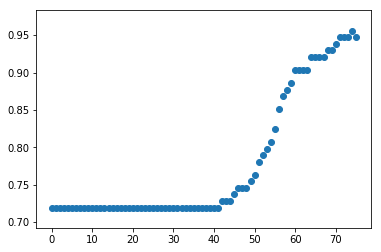

In [250]:
plt.scatter(inds, accuracy)

In [251]:
spam_data = pd.read_csv('spam.csv')
spam_label = spam_data['label']
spam_x = spam_data.drop(['label'], axis=1).values
spam_x = MinMaxScaler().fit_transform(spam_x)
spam_x = np.column_stack((spam_x, np.array([1] * len(spam_x))))
#cancer_label = np.array([1 if label == 'M' else 0 for label in cancer_label.values])
spam_x_train, spam_x_eval, spam_label_train, spam_label_eval = train_test_split(spam_x, spam_label, train_size=0.8)

In [252]:
accuracy = []
inds = []
batch_size = 200
w = np.zeros(len(spam_x_train[0]))
classes = classify(w, spam_x_eval)
biggest_acc = len(classes[classes == spam_label_eval]) / len(classes)
best = w
prev = w
k = 0
ind = 0
flag = False
while True:
    prev = best
    bigbigacc = biggest_acc
    for i in range(0, len(spam_x_train), batch_size):
        X = spam_x_train[i:i+batch_size]
        Y = spam_label_train[i:i+batch_size]
        w = w - 0.01 * grad(w, np.column_stack((Y, X)))
        classes = classify(w, spam_x_eval)
        acc = len(classes[classes == spam_label_eval]) / len(classes)
        accuracy.append(acc)
        inds.append(ind)
        ind += 1
        if acc <= biggest_acc - 0.01:
            flag = True
            break
        else:
            best = w
            biggest_acc = acc
    if flag:
        break

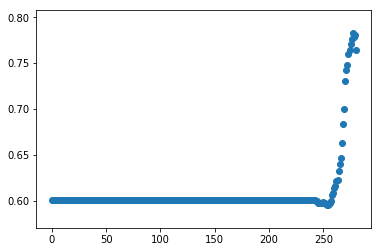

In [253]:
plt.scatter(inds, accuracy)

In [254]:
mnist_data = pd.read_csv('mnist.csv')
print(mnist_data.shape)
mnist_labels = mnist_data['label']
mnist_x = mnist_data.drop(['label'], axis=1).values
new_mnist_x = []
for x in mnist_x:
    matr = []
    k = 0
    for i in range(28):
        a = []
        for j in range(28):
            a.append(x[k])
            k += 1
        matr.append(a)
    new_mnist_x.append([matr])
mnist_x = np.array(new_mnist_x)
print(mnist_x.shape)

(10000, 785)


(10000, 1, 28, 28)


In [255]:
 os.getcwd()
 #os.chdir('../')
# os.getcwd()
#os.chdir('./notMNIST_small')

'/Users/user/PycharmProjects/MLHW1'

In [256]:
notMNIST_small_labels = []
notMNIST_small_x = []
cur_label = 'A'
for path in os.listdir('notMNIST_small'):
    cur_label = path
    print(cur_label)
    for file in os.listdir('notMNIST_small' + '/' + path):
        if os.path.getsize('notMNIST_small' + '/' + path + '/' + file) != 0:
            notMNIST_small_x.append(plt.imread('notMNIST_small' + '/' + path + '/' + file))
            notMNIST_small_labels.append(cur_label)
notMNIST_small_labels = np.array(notMNIST_small_labels)
notMNIST_small_x = np.array(notMNIST_small_x)

I


G


A


F


H


J


C


D


E


B


In [257]:
print(notMNIST_small_x.shape)

(18724, 28, 28)


In [258]:
mnist_x_train, mnist_x_eval, mnist_labels_train, mnist_labels_eval = train_test_split(mnist_x, mnist_labels, train_size=0.8)

In [259]:
#https://python-scripts.com/build-neural-network
class Net(nn.Module):
    def __init__(self, action):
        super(Net, self).__init__() 
        self.convolution1 = nn.Conv2d(1,8,3)
        self.convolution2 = nn.Conv2d(8,8,3)
        self.convolution3 = nn.Conv2d(8,8,3)
        self.fc1 = nn.Linear(8 * 22 * 22, 64)  # 1й связанный слой
        self.action = action                         # Нелинейный слой
        self.fc2 = nn.Linear(64, 10) # 2й связанный слой
    
    def forward(self, x):                              # Передний пропуск: складывание каждого слоя вместе
        x = self.action(self.convolution1(x))
        x = self.action(self.convolution2(x))
        x = self.action(self.convolution3(x))
        x = x.view(-1, 8 * 22 * 22)
        x = self.action(self.fc1(x))
        x = self.fc2(x)
        return x

In [260]:
t1 = []
for x in mnist_x_train:
    t1.append(torch.Tensor(x))
trl = DataLoader(TensorDataset(torch.stack(t1), torch.Tensor(mnist_labels_train).long()), batch_size=4,shuffle=True )

In [261]:
t2 = []
for x in mnist_x_eval:
    t2.append(torch.Tensor(x))
evl = DataLoader(TensorDataset(torch.stack(t2), torch.Tensor(np.array(mnist_labels_eval)).long()), batch_size=5,shuffle=True )

In [262]:
print('relu')
neural_net1 = Net(F.relu)
epoch = 2
optimr = optim.SGD(neural_net1.parameters(), lr=0.001, momentum=0.9)
for i in range(epoch):
    rl = 0
    for k, t in enumerate(trl, 0):
        xs, ls = t
        optimr.zero_grad()
        outs = neural_net1(xs)
        loss = nn.CrossEntropyLoss()(outs, ls.view(-1))
        loss.backward()
        optimr.step()
        rl += loss.item()
        if (k + 1) % 100 == 0:
            print("[" + str(2) + ", " +  str(k + 1) + "] loss " + str(rl) )
    tpfs = 0.0
    N = 0
    with torch.no_grad():
        for t in evl:
            xs, labels = t
            outs = neural_net1(xs)
            pr = torch.max(outs.data, 1)[1]
            for j in range(pr.size(0)):
                N += 1
                if pr[j] == labels[j]:
                    tpfs += 1
    print("accuracy " + str(tpfs / N))

relu


[2, 100] loss 136.89903593063354


[2, 200] loss 203.5289804637432


[2, 300] loss 254.0493804514408


[2, 400] loss 297.09353172779083


[2, 500] loss 338.27110600471497


[2, 600] loss 378.2535591125488


[2, 700] loss 416.8813658952713


[2, 800] loss 441.43240934610367


[2, 900] loss 476.8842476606369


[2, 1000] loss 506.6008640527725


[2, 1100] loss 540.2822290062904


[2, 1200] loss 567.4892272055149


[2, 1300] loss 596.6798580288887


[2, 1400] loss 620.3923460543156


[2, 1500] loss 651.5670644938946


[2, 1600] loss 669.7344718277454


[2, 1700] loss 694.5304472148418


[2, 1800] loss 717.6960356831551


[2, 1900] loss 738.4440635442734


[2, 2000] loss 767.67584836483


accuracy 0.9065


[2, 100] loss 14.777938783168793


[2, 200] loss 27.33758717775345


[2, 300] loss 42.74492859840393


[2, 400] loss 57.61928004026413


[2, 500] loss 63.25275927782059


[2, 600] loss 74.32597422599792


[2, 700] loss 90.90051877498627


[2, 800] loss 100.71566903591156


[2, 900] loss 116.58410060405731


[2, 1000] loss 131.68328481912613


[2, 1100] loss 145.36266082525253


[2, 1200] loss 158.46753042936325


[2, 1300] loss 174.76592373847961


[2, 1400] loss 197.64297610521317


[2, 1500] loss 207.74319410324097


[2, 1600] loss 228.72162321209908


[2, 1700] loss 254.0644889175892


[2, 1800] loss 272.3292354643345


[2, 1900] loss 278.98680928349495


[2, 2000] loss 294.3302804529667


accuracy 0.947


In [242]:
print('tanh')
neural_net2 = Net(F.tanh)
epoch = 2
optimr = optim.SGD(neural_net2.parameters(), lr=0.001, momentum=0.9)
for i in range(epoch):
    rl = 0
    for k, t in enumerate(trl, 0):
        xs, ls = t
        optimr.zero_grad()
        outs = neural_net2(xs)
        loss = nn.CrossEntropyLoss()(outs, ls.view(-1))
        loss.backward()
        optimr.step()
        rl += loss.item()
        if (k + 1) % 100 == 0:
            print("[" + str(2) + ", " +  str(k + 1) + "] loss " + str(rl) )
    tpfs = 0.0
    N = 0
    with torch.no_grad():
        for t in evl:
            xs, labels = t
            outs = neural_net2(xs)
            pr = torch.max(outs.data, 1)[1]
            for j in range(pr.size(0)):
                N += 1
                if pr[j] == labels[j]:
                    tpfs += 1
    print("accuracy " + str(tpfs / N))

tanh


[2, 100] loss 200.14215469360352


[2, 200] loss 301.3225455880165


[2, 300] loss 375.2416514456272


[2, 400] loss 417.9365883767605


[2, 500] loss 456.3204273879528


[2, 600] loss 494.8808151781559


[2, 700] loss 529.8941686749458


[2, 800] loss 558.6648871302605


[2, 900] loss 588.1407391130924


[2, 1000] loss 617.1968248784542


[2, 1100] loss 644.1844480335712


[2, 1200] loss 664.0815488696098


[2, 1300] loss 685.2776824235916


[2, 1400] loss 706.6844468712807


[2, 1500] loss 727.0025880336761


[2, 1600] loss 747.4788153767586


[2, 1700] loss 766.2153412699699


[2, 1800] loss 785.5107125639915


[2, 1900] loss 800.3373780250549


[2, 2000] loss 814.1183114647865


accuracy 0.9535


[2, 100] loss 15.456865340471268


[2, 200] loss 31.63791486620903


[2, 300] loss 46.32773408293724


[2, 400] loss 61.7569297850132


[2, 500] loss 73.27361366152763


[2, 600] loss 86.06789499521255


[2, 700] loss 100.25505244731903


[2, 800] loss 119.08620017766953


[2, 900] loss 132.7033447623253


[2, 1000] loss 150.63426756858826


[2, 1100] loss 160.95987623929977


[2, 1200] loss 173.13842344284058


[2, 1300] loss 186.55145940184593


[2, 1400] loss 198.82767429947853


[2, 1500] loss 211.15162786841393


[2, 1600] loss 221.3402654826641


[2, 1700] loss 229.86450710892677


[2, 1800] loss 241.77869129180908


[2, 1900] loss 256.35588186979294


[2, 2000] loss 266.8070286512375


accuracy 0.9675


In [268]:
print('sigmoid')
neural_net3 = Net(F.sigmoid)
epoch = 2
optimr = optim.SGD(neural_net3.parameters(), lr=0.001, momentum=0.9)
for i in range(epoch):
    rl = 0
    for k, t in enumerate(trl, 0):
        xs, ls = t
        optimr.zero_grad()
        outs = neural_net3(xs)
        loss = nn.CrossEntropyLoss()(outs, ls.view(-1))
        loss.backward()
        optimr.step()
        rl += loss.item()
        if (k + 1) % 100 == 0:
            print("[" + str(2) + ", " +  str(k + 1) + "] loss " + str(rl) )
    tpfs = 0.0
    N = 0
    with torch.no_grad():
        for t in evl:
            xs, labels = t
            outs = neural_net3(xs)
            pr = torch.max(outs.data, 1)[1]
            for j in range(pr.size(0)):
                N += 1
                if pr[j] == labels[j]:
                    tpfs += 1
    print("accuracy " + str(tpfs / N))

sigmoid


[2, 100] loss 157.5756444633007


[2, 200] loss 228.36152163147926


[2, 300] loss 290.9657144546509


[2, 400] loss 359.29061782360077


[2, 500] loss 414.30709078907967


[2, 600] loss 450.8126113116741


[2, 700] loss 504.339995265007


[2, 800] loss 545.5955657958984


[2, 900] loss 578.5659522116184


[2, 1000] loss 611.7792108356953


[2, 1100] loss 646.3583781123161


[2, 1200] loss 681.3290233314037


[2, 1300] loss 709.5291219055653


[2, 1400] loss 729.5894075334072


[2, 1500] loss 761.7758877575397


[2, 1600] loss 785.3292198777199


[2, 1700] loss 806.8200612068176


[2, 1800] loss 827.0675014257431


[2, 1900] loss 854.7956036627293


[2, 2000] loss 878.5768695771694


accuracy 0.935


[2, 100] loss 21.472003996372223


[2, 200] loss 39.06857615709305


[2, 300] loss 51.887199103832245


[2, 400] loss 66.46991640329361


[2, 500] loss 84.29717889428139


[2, 600] loss 101.82754150032997


[2, 700] loss 111.22868266701698


[2, 800] loss 134.09806695580482


[2, 900] loss 149.1762664616108


[2, 1000] loss 157.30828562378883


[2, 1100] loss 171.06769612431526


[2, 1200] loss 189.40371790528297


[2, 1300] loss 200.35674622654915


[2, 1400] loss 217.02074947953224


[2, 1500] loss 236.7629044353962


[2, 1600] loss 253.06372436881065


[2, 1700] loss 271.01070088148117


[2, 1800] loss 282.95527732372284


[2, 1900] loss 295.24369019269943


[2, 2000] loss 308.8288945555687


accuracy 0.9365
